In [4]:
import os
import sys
import io
import numpy as np
import pandas as pd
import geopandas as gpd
import urllib
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
import requests

%matplotlib inline

## Census tracts

In [183]:
if not os.path.isfile("data/Census_Tracts_2010.gz"):
    # https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyct2010_19a.zip
    url = 'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "Census_Tracts_2010.gz")
    !mv Census_Tracts_2010.gz data
    !unzip -o data/Census_Tracts_2010.gz -d data/Census_Tracts_2010
else:
    print("file in place, you can continue")

file in place, you can continue


In [184]:
filename = ! ls data/Census_Tracts_2010 | grep .shp
CensusTracts = gpd.GeoDataFrame.from_file('data/Census_Tracts_2010/' + filename[0])
CensusTracts = CensusTracts[CensusTracts['boro_name']=='Manhattan']
print(CensusTracts.shape)
CensusTracts.head()

(288, 12)


,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98411754823195 40.7548420534646,..."


In [7]:
len(CensusTracts['ct2010'].unique())

288

In [8]:
len(CensusTracts['ctlabel'].unique())

288

In [9]:
len(CensusTracts['boro_ct201'].unique())

288

## Census Data

In [10]:
if not os.path.isfile("data/nyc_census_tracts.csv"):
    ! curl https://raw.githubusercontent.com/JunjieTsai/MLC2019_Project/master/data/nyc_census_tracts.csv > data/nyc_census_tracts.csv
else:
    print("file in place, you can continue")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  398k  100  398k    0     0  2372k      0 --:--:-- --:--:-- --:--:-- 2372k


In [11]:
census_tracts_data = pd.read_csv("data/nyc_census_tracts.csv")
census_tracts_data = census_tracts_data[census_tracts_data['Borough']=='Manhattan']
census_tracts_data['CensusTract'] = census_tracts_data['CensusTract'].astype(str)
print(census_tracts_data.shape)
census_tracts_data.head()

(288, 36)


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1100,36061000100,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1101,36061000201,New York,Manhattan,2791,1301,1490,35.3,12.4,6.2,0.0,...,28.2,6.3,1.7,33.0,1105,90.1,7.1,2.8,0.0,2.6
1102,36061000202,New York,Manhattan,7768,3314,4454,36.8,17.6,12.8,0.0,...,29.7,9.1,7.0,30.9,2667,74.1,19.8,6.1,0.0,15.1
1103,36061000500,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1104,36061000600,New York,Manhattan,12554,5966,6588,33.2,3.4,12.0,0.4,...,37.6,5.1,2.9,30.3,4028,85.0,10.2,4.8,0.0,8.7


In [12]:
temp = []
for i in CensusTracts['ct2010']:
    for j in census_tracts_data['CensusTract']:
        j = j[5:]
        if i==j:
            temp.append((i,j))
print(len(temp))
print(len(set(temp)))
temp

288
288


[('009800', '009800'),
 ('010000', '010000'),
 ('010200', '010200'),
 ('010400', '010400'),
 ('011300', '011300'),
 ('011402', '011402'),
 ('013000', '013000'),
 ('014000', '014000'),
 ('014801', '014801'),
 ('018400', '018400'),
 ('019000', '019000'),
 ('020600', '020600'),
 ('024900', '024900'),
 ('026100', '026100'),
 ('026300', '026300'),
 ('026700', '026700'),
 ('026900', '026900'),
 ('027700', '027700'),
 ('012500', '012500'),
 ('011900', '011900'),
 ('022500', '022500'),
 ('029300', '029300'),
 ('003001', '003001'),
 ('005600', '005600'),
 ('001600', '001600'),
 ('012000', '012000'),
 ('012800', '012800'),
 ('012100', '012100'),
 ('015001', '015001'),
 ('010601', '010601'),
 ('022600', '022600'),
 ('005501', '005501'),
 ('020800', '020800'),
 ('013400', '013400'),
 ('009200', '009200'),
 ('011401', '011401'),
 ('000100', '000100'),
 ('013100', '013100'),
 ('006500', '006500'),
 ('019800', '019800'),
 ('020000', '020000'),
 ('014900', '014900'),
 ('022700', '022700'),
 ('017402',

## Google POI


In [13]:
if not os.path.isfile("data/poi.zip"):
    url = 'https://github.com/JunjieTsai/MLC2019_Project/raw/master/data/poi/poi.zip'
    urllib.request.urlretrieve(url, "poi.zip")
    !mv poi.zip data
    !unzip -o data/poi.zip -d data/poi
else:
    print("file in place, you can continue")

Archive:  data/poi.zip
  inflating: data/poi/SchoolDroppedDuplicates.csv  
  inflating: data/poi/subway_station.csv  
  inflating: data/poi/SubwayStationDroppedDuplicates.csv  
  inflating: data/poi/train_station.csv  
  inflating: data/poi/TrainStationDroppedDuplicates.csv  
  inflating: data/poi/bar.csv        
  inflating: data/poi/BarDroppedDuplicates.csv  
  inflating: data/poi/bus_station.csv  
  inflating: data/poi/BusStationDroppedDuplicates.csv  
  inflating: data/poi/convenience_store.csv  
  inflating: data/poi/ConvenienceStoreDroppedDuplicates.csv  
  inflating: data/poi/hospital.csv   
  inflating: data/poi/HospitalDroppedDuplicates.csv  
  inflating: data/poi/lodging.csv    
  inflating: data/poi/LodgingDroppedDuplicates.csv  
  inflating: data/poi/night_club.csv  
  inflating: data/poi/NightClubDroppedDuplicates.csv  
  inflating: data/poi/pharmacy.csv   
  inflating: data/poi/PharmacyDroppedDuplicates.csv  
  inflating: data/poi/restaurant.csv  
  inflating: data/poi/Re

In [14]:
filename = ! ls data/poi | grep .csv
filename

['BarDroppedDuplicates.csv',
 'BusStationDroppedDuplicates.csv',
 'ConvenienceStoreDroppedDuplicates.csv',
 'HospitalDroppedDuplicates.csv',
 'LodgingDroppedDuplicates.csv',
 'NightClubDroppedDuplicates.csv',
 'PharmacyDroppedDuplicates.csv',
 'RestaurantDroppedDuplicates.csv',
 'SchoolDroppedDuplicates.csv',
 'SubwayStationDroppedDuplicates.csv',
 'TrainStationDroppedDuplicates.csv',
 'bar.csv',
 'bus_station.csv',
 'convenience_store.csv',
 'hospital.csv',
 'lodging.csv',
 'night_club.csv',
 'pharmacy.csv',
 'restaurant.csv',
 'school.csv',
 'subway_station.csv',
 'train_station.csv']

In [15]:
poi = pd.read_csv('data/poi/' + filename[2])
print(poi.shape)
poi.head()

(710, 4)


,Unnamed: 0,ConvenienceStoreId,lat,lon
0,0,0,40.729716,-73.992005
1,1,1,40.731758,-73.994853
2,2,2,40.734076,-73.989505
3,3,3,40.729954,-73.986350
4,4,4,40.734279,-73.990257


## Subway

In [16]:
if not os.path.isfile("data/subway.gz"):
    url = 'https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "subway.gz")
    !mv subway.gz data
    !unzip -o data/subway.gz -d data/subway
else:
    print("file in place, you can continue")

Archive:  data/subway.gz
  inflating: data/subway/geo_export_0f0bd5b5-1fb9-459a-872f-d392204cb1ff.dbf  
  inflating: data/subway/geo_export_0f0bd5b5-1fb9-459a-872f-d392204cb1ff.shp  
  inflating: data/subway/geo_export_0f0bd5b5-1fb9-459a-872f-d392204cb1ff.shx  
  inflating: data/subway/geo_export_0f0bd5b5-1fb9-459a-872f-d392204cb1ff.prj  


In [17]:
filename = ! ls data/subway | grep .shp
subway = gpd.GeoDataFrame.from_file('data/subway/' + filename[0])
print(subway.shape)
subway.head()

(1928, 5)


,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86835600032798 40.84916900104506)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821300022677 40.84912800131844)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87349900050798 40.84122300105249)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289199978331 40.84145300067447)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962300013866 40.84081500075867)


## bus station

In [43]:
if not os.path.isfile("data/bus.csv"):
    ! curl https://raw.githubusercontent.com/JunjieTsai/MLC2019_Project/master/data/bus_stop.csv > data/bus.csv
else:
    print("file in place, you can continue")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1867k  100 1867k    0     0  7530k      0 --:--:-- --:--:-- --:--:-- 7530k


In [44]:
bus = pd.read_csv("data/bus.csv")
print(bus.shape)
bus.head()

(16231, 7)


,Unnamed: 0,stop_id,stop_lat,stop_lon,stop_name,lonlat,geometry
0,0,300000,40.578350,-73.940029,ORIENTAL BL/MACKENZIE ST,"(-73.94002900000001, 40.57835)",POINT (-73.94002900000001 40.57835)
1,1,300002,40.578066,-73.943029,ORIENTAL BL/JAFFRAY ST,"(-73.94302900000001, 40.578066)",POINT (-73.94302900000001 40.578066)
2,2,300003,40.577909,-73.944643,ORIENTAL BL/HASTINGS ST,"(-73.944643, 40.577909000000005)",POINT (-73.944643 40.57790900000001)
3,3,300004,40.577718,-73.946200,ORIENTAL BL/FALMOUTH ST,"(-73.9462, 40.577718)",POINT (-73.9462 40.577718)
4,4,300006,40.577353,-73.949552,ORIENTAL BL/DOVER ST,"(-73.949552, 40.577353)",POINT (-73.949552 40.577353)


## Park

In [22]:
if not os.path.isfile("data/parks.gz"):
    url = 'https://data.cityofnewyork.us/api/geospatial/g84h-jbjm?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "parks.gz")
    !mv parks.gz data
    !unzip -o data/parks.gz -d data/parks
else:
    print("file in place, you can continue")

Archive:  data/parks.gz
  inflating: data/parks/geo_export_d9f4e30e-ba30-4a3a-8d7a-1e0faf558dea.dbf  
  inflating: data/parks/geo_export_d9f4e30e-ba30-4a3a-8d7a-1e0faf558dea.shp  
  inflating: data/parks/geo_export_d9f4e30e-ba30-4a3a-8d7a-1e0faf558dea.shx  
  inflating: data/parks/geo_export_d9f4e30e-ba30-4a3a-8d7a-1e0faf558dea.prj  


In [23]:
filename = ! ls data/parks | grep .shp
parks = gpd.GeoDataFrame.from_file('data/parks/' + filename[0])
print(parks.shape)
parks.head()

(12491, 11)


,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,POLYGON ((-73.97922375065221 40.69799879369959...
1,4980.0,Neighborhood Park,Pierrepont Playground,B222,21960.494920,607.555193,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99732028095745 40.69600764072165...
2,4980.0,Neighborhood Park,Cobble Hill Park,B326,28079.076265,784.421990,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99557419919979 40.68792918280799...
3,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.97746661925957 40.69650941986475...
4,4980.0,Triangle/Plaza,Brooklyn Heights Promenade,B223DG,14465.699799,1376.106398,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99746719287955 40.69692380834881...


## Crime

In [180]:
if not os.path.isfile("data/crime.csv"):
    ! curl https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD > data/crime.csv
else:
    print("file in place, you can continue")

file in place, you can continue


In [181]:
crime = pd.read_csv("data/crime.csv")
print(crime.shape)
crime.head()

(464065, 35)


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,651421035,41.0,BRONX,11/28/2018,00:00:00,11/28/2018,00:01:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN
1,149013323,14.0,MANHATTAN,12/31/2018,23:40:00,12/31/2018,23:50:00,COMPLETED,NaN,NaN,...,NaN,NaN,45-64,WHITE,F,987866.0,214721.0,40.756044,-73.986950,"(40.75604353500006, -73.98694954399997)"
2,642981531,73.0,BROOKLYN,12/31/2018,23:30:00,12/31/2018,23:40:00,COMPLETED,NaN,NaN,...,F,NaN,18-24,WHITE HISPANIC,F,1006995.0,185258.0,40.675146,-73.918003,"(40.67514616200003, -73.91800323399997)"
3,429685363,67.0,BROOKLYN,12/31/2018,23:20:00,12/31/2018,23:30:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,BLACK,F,999584.0,169903.0,40.633016,-73.944756,"(40.63301598000004, -73.94475559899996)"
4,290330841,5.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:20:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,WHITE,M,986164.0,202140.0,40.721512,-73.993096,"(40.72151233500005, -73.99309646799998)"


In [185]:
crime1 = crime[['CMPLNT_NUM', 'ADDR_PCT_CD',
                'BORO_NM', 'RPT_DT', 'LAW_CAT_CD','Latitude', 'Longitude']]

crime1 = crime1.dropna()

from geopandas.tools import sjoin
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
from fiona.crs import from_epsg
# crime1['Lat_Lon'] = pd.to_numeric(crime1['Lat_Lon'],errors='coerce')
crime1['lonlat']=list(zip(crime1.Longitude,crime1.Latitude))
crime1['geometry']=crime1[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

crime1 = crime1[['LAW_CAT_CD', 'geometry']]
crime_count = crime1['LAW_CAT_CD'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

crime1_gpd = gpd.GeoDataFrame(crime1)
CensusTracts_gpd = gpd.GeoDataFrame(CensusTracts)
crime_ct = gpd.sjoin(CensusTracts_gpd, crime1_gpd)
crime_ct2 = crime_ct.groupby(['boro_ct201','LAW_CAT_CD']).size().reset_index(name='counts')
crime_ct3 = crime_ct2.pivot(index = 'boro_ct201', columns = 'LAW_CAT_CD', values = 'counts')
# df.pivot(index='date', columns='name', values='dollars')
crime_ct3.head()

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
boro_ct201,,,
1000201,54,90,21
1000202,68,155,51
1000600,173,286,57
1000700,99,349,56
1000800,117,294,88


In [86]:
crime1 = crime[['CMPLNT_NUM', 'ADDR_PCT_CD',
                'BORO_NM', 'RPT_DT', 'LAW_CAT_CD','Latitude', 'Longitude']]
crime1.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,RPT_DT,LAW_CAT_CD,Latitude,Longitude
0,651421035,41.0,BRONX,11/29/2018,MISDEMEANOR,NaN,NaN
1,149013323,14.0,MANHATTAN,12/31/2018,FELONY,40.756044,-73.986950
2,642981531,73.0,BROOKLYN,12/31/2018,MISDEMEANOR,40.675146,-73.918003
3,429685363,67.0,BROOKLYN,12/31/2018,MISDEMEANOR,40.633016,-73.944756
4,290330841,5.0,MANHATTAN,12/31/2018,MISDEMEANOR,40.721512,-73.993096


In [87]:
crime1.shape

(464065, 7)

In [88]:
crime1 = crime1.dropna()
crime1.shape

(463729, 7)

In [90]:

from geopandas.tools import sjoin
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
from fiona.crs import from_epsg
# crime1['Lat_Lon'] = pd.to_numeric(crime1['Lat_Lon'],errors='coerce')
crime1['lonlat']=list(zip(crime1.Longitude,crime1.Latitude))
crime1['geometry']=crime1[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [104]:
crime1 = crime1[['LAW_CAT_CD', 'geometry']]
crime1.head()

,LAW_CAT_CD,geometry
1,FELONY,POINT (-73.98694954399997 40.75604353500006)
2,MISDEMEANOR,POINT (-73.91800323399997 40.67514616200003)
3,MISDEMEANOR,POINT (-73.94475559899995 40.63301598000004)
4,MISDEMEANOR,POINT (-73.99309646799998 40.72151233500005)
5,MISDEMEANOR,POINT (-73.90934005599996 40.85290843100006)


In [105]:
crime1.shape

(463729, 2)

In [106]:
crime_count = crime1['LAW_CAT_CD'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})
crime_count

,values,LAW_CAT_CD
0,MISDEMEANOR,251518
1,FELONY,141084
2,VIOLATION,71127


In [110]:

crime1_gpd = gpd.GeoDataFrame(crime1)
crime1_gpd.head()

,LAW_CAT_CD,geometry
1,FELONY,POINT (-73.98694954399997 40.75604353500006)
2,MISDEMEANOR,POINT (-73.91800323399997 40.67514616200003)
3,MISDEMEANOR,POINT (-73.94475559899995 40.63301598000004)
4,MISDEMEANOR,POINT (-73.99309646799998 40.72151233500005)
5,MISDEMEANOR,POINT (-73.90934005599996 40.85290843100006)


In [111]:
CensusTracts_gpd = gpd.GeoDataFrame(CensusTracts)
CensusTracts_gpd.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98411754823195 40.7548420534646,..."


In [112]:
crime_ct = gpd.sjoin(CensusTracts_gpd, crime1_gpd)
crime_ct.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,index_right,LAW_CAT_CD
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,243717,MISDEMEANOR
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,313786,MISDEMEANOR
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,256097,FELONY
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,417771,MISDEMEANOR
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,397734,MISDEMEANOR


In [113]:
crime_ct.shape

(115242, 14)

In [117]:
crime_ct1 = crime_ct.groupby(['boro_ct201', 'LAW_CAT_CD']).agg(['count'])
crime_ct1.head()

boro_code boro_name cdeligibil ct2010 ctlabel ntacode  \
                           count     count      count  count   count   count   
boro_ct201 LAW_CAT_CD                                                          
1000201    FELONY             54        54         54     54      54      54   
           MISDEMEANOR        90        90         90     90      90      90   
           VIOLATION          21        21         21     21      21      21   
1000202    FELONY             68        68         68     68      68      68   
           MISDEMEANOR       155       155        155    155     155     155   

                       ntaname  puma shape_area shape_leng geometry  \
                         count count      count      count    count   
boro_ct201 LAW_CAT_CD                                                 
1000201    FELONY           54    54         54         54       54   
           MISDEMEANOR      90    90         90         90       90   
           VIOLATION        21    21         21         21       21   
1000202    FELONY           68    68         68         68       68   
           MISDEMEANOR     155   155        155        155      155   

                       index_right  
                             count  
boro_ct201 LAW_CAT_CD               
1000201    FELONY               54  
           MISDEMEANOR          90  
           VIOLATION            21  
1000202    FELONY               68  
           MISDEMEANOR         155

In [132]:
crime_ct2 = crime_ct.groupby(['boro_ct201','LAW_CAT_CD']).size().reset_index(name='counts')
crime_ct2.head()

,boro_ct201,LAW_CAT_CD,counts
0,1000201,FELONY,54
1,1000201,MISDEMEANOR,90
2,1000201,VIOLATION,21
3,1000202,FELONY,68
4,1000202,MISDEMEANOR,155


In [135]:
crime_ct3 = crime_ct2.pivot(index = 'boro_ct201', columns = 'LAW_CAT_CD', values = 'counts')
# df.pivot(index='date', columns='name', values='dollars')
crime_ct3.head()

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
boro_ct201,,,
1000201,54,90,21
1000202,68,155,51
1000600,173,286,57
1000700,99,349,56
1000800,117,294,88


## SAT

### SAT

In [99]:
if not os.path.isfile("data/sat.csv"):
    ! curl https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD > data/sat.csv
else:
    print("file in place, you can continue")

file in place, you can continue


In [142]:
sat = pd.read_csv("data/sat.csv")
print(sat.shape)
sat.head()

(478, 6)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [143]:
sat['School_District'] = sat.DBN.str[1]
sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,School_District
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1


### School distrct

In [144]:
if not os.path.isfile("data/school_distrct.zip"):
    url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nysd_19a.zip'
    urllib.request.urlretrieve(url, "school_distrct.zip")
    ! mv school_distrct.zip data
    ! unzip -o data/school_distrct.zip -d data/school_distrct
else:
    print("file in place, you can continue")

file in place, you can continue


In [145]:
filename = ! ls data/school_distrct/nysd_19a | grep .shp
school_distrct = gpd.GeoDataFrame.from_file('data/school_distrct/nysd_19a/' + filename[0])
print(school_distrct.shape)
school_distrct.head()

(33, 4)


,SchoolDist,Shape_Leng,Shape_Area,geometry
0,16,35848.904605,4.676362e+07,"POLYGON ((1002796.091003418 192779.0115966797,..."
1,32,37251.057847,5.189850e+07,"POLYGON ((1008702.936035156 195569.1040039062,..."
2,23,40317.452033,4.740069e+07,(POLYGON ((1006320.817993164 181792.0223999023...
3,29,135035.241651,4.201981e+08,"POLYGON ((1056821.168212891 204964.1148071289,..."
4,26,125677.678898,4.247909e+08,"POLYGON ((1055302.83001709 222915.1176147461, ..."


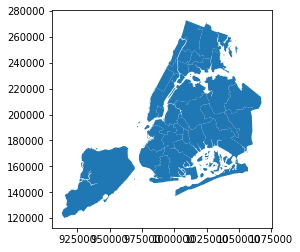

In [146]:
school_distrct.plot()

In [147]:
sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,School_District
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1


In [148]:
school_distrct.SchoolDist.dtype

dtype('int64')

In [149]:
sat.School_District = sat.School_District.astype('int')
pd.to_numeric(sat.School_District)
sat.School_District.dtype

dtype('int64')

In [168]:
school_sat = sat.merge(school_distrct, left_on = 'School_District', right_on = 'SchoolDist', how = 'outer')

# test = pd.concat([school_distrct, sat])
school_sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,School_District,SchoolDist,Shape_Leng,Shape_Area,geometry
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."


In [169]:
school_sat.shape

(502, 11)

In [170]:
school_sat = school_sat.dropna()
school_sat.shape

(435, 11)

In [171]:
school_sat = school_sat[school_sat['SchoolDist'] < 7]

In [172]:
school_sat.shape

(289, 11)

In [173]:
school_sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,School_District,SchoolDist,Shape_Leng,Shape_Area,geometry
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1.0,1.0,28641.276279,3.516075e+07,"POLYGON ((992073.466796875 203714.0759887695, ..."


In [175]:
school_sat = school_sat[['DBN', 'Num of SAT Test Takers', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score', 'School_District', 'geometry']]
school_sat.head()

,DBN,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,School_District,geometry
0,01M292,29,355,404,363,1.0,"POLYGON ((992073.466796875 203714.0759887695, ..."
1,01M448,91,383,423,366,1.0,"POLYGON ((992073.466796875 203714.0759887695, ..."
2,01M450,70,377,402,370,1.0,"POLYGON ((992073.466796875 203714.0759887695, ..."
3,01M458,7,414,401,359,1.0,"POLYGON ((992073.466796875 203714.0759887695, ..."
4,01M509,44,390,433,384,1.0,"POLYGON ((992073.466796875 203714.0759887695, ..."


In [177]:
# school_sat.to_csv('school_sat.csv')